# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Paillasse d'expérimentation
---

## Sujet : Filtrage Corpus App

---


## Initialisation de la paillasse 
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd

## Observations et environnement
---

### Chargement du corpus

In [3]:
corpus_filename = 'corpus/221003-CorpusApp.csv'

In [4]:
df_corpus = pd.read_csv(f'data/{corpus_filename}')
df_corpus = df_corpus.convert_dtypes()

/var/folders/n0/92k02lss71s67fxfyc0qn84m0000gn/T/ipykernel_24674/3410691136.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_corpus = pd.read_csv(f'data/{corpus_filename}')


In [5]:
df_corpus

,url,title,article,author,date_iso,site,infox,y_proba
0,https://reseauinternational.net/tous-les-jeune...,"Tous les jeunes, portez la nouvelle (russe)",par Pepe Escobar. L’OCS à Samarcande et l’Asse...,<NA>,2022-09-30T00:00:00,reseauinternational.net,0,0.002944
1,https://reseauinternational.net/adhesion-a-la-...,Adhésion à la Russie : 93% pour le « oui » dan...,"Dans les régions de Zaporijia et de Kherson, 9...",<NA>,2022-09-30T00:00:00,reseauinternational.net,0,0.01263
2,https://lemediaen442.fr/onu-le-premier-ministr...,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,<NA>,2022-09-29T00:00:00,lemediaen442.fr,1,0.963768
3,https://www.francesoir.fr/societe-environnemen...,Compostage humain: les “funérailles vertes” ga...,"Aux États-Unis, les différents gouvernements r...",Auteur(s) FranceSoir,2022-09-28T13:15:00,www.francesoir.fr,0,0.007914
4,https://www.breizh-info.com/2022/09/27/208410/...,Donatello : génie de la Renaissance,"Portrait du sculpteur Donatello (1386-1466), p...",<NA>,2022-09-27T00:00:00,www.breizh-info.com,<NA>,0.075435
...,...,...,...,...,...,...,...,...
89157,https://www.profession-gendarme.com/zelensky-e...,Zelensky est « une marionnette qui fait inutil...,Encore un journaliste surpris qu’un colonel am...,<NA>,<NA>,www.profession-gendarme.com,<NA>,0.556761
89158,https://www.profession-gendarme.com/zelensky-l...,Zélensky : l’arnaque de la contre-offensive uk...,Le président Zelensky et ses alliés de l’Otan ...,<NA>,<NA>,www.profession-gendarme.com,<NA>,0.164531
89159,https://www.profession-gendarme.com/zelensky-m...,Zelensky massacre maintenant des citoyens ukra...,ZELENSKY A ORDONNÉ QUE TOUTES LES PERSONNES FU...,<NA>,<NA>,www.profession-gendarme.com,<NA>,0.673791
89160,https://www.profession-gendarme.com/zero-mort-...,Zéro mort du coronavirus : comment expliquer l...,Le Vietnam est une exception dans le monde : a...,<NA>,<NA>,www.profession-gendarme.com,<NA>,0.103192


## Expérience
---

### Enlever Articles Vides ou trop courts

In [6]:
df_corpus = df_corpus[df_corpus['article'].notna()]

In [7]:
def trop_court(article):
    return len(article)<10

In [8]:
df_corpus = df_corpus[df_corpus['article'].apply(trop_court)==False]

In [9]:
df_corpus

,url,title,article,author,date_iso,site,infox,y_proba
0,https://reseauinternational.net/tous-les-jeune...,"Tous les jeunes, portez la nouvelle (russe)",par Pepe Escobar. L’OCS à Samarcande et l’Asse...,<NA>,2022-09-30T00:00:00,reseauinternational.net,0,0.002944
1,https://reseauinternational.net/adhesion-a-la-...,Adhésion à la Russie : 93% pour le « oui » dan...,"Dans les régions de Zaporijia et de Kherson, 9...",<NA>,2022-09-30T00:00:00,reseauinternational.net,0,0.01263
2,https://lemediaen442.fr/onu-le-premier-ministr...,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,<NA>,2022-09-29T00:00:00,lemediaen442.fr,1,0.963768
3,https://www.francesoir.fr/societe-environnemen...,Compostage humain: les “funérailles vertes” ga...,"Aux États-Unis, les différents gouvernements r...",Auteur(s) FranceSoir,2022-09-28T13:15:00,www.francesoir.fr,0,0.007914
4,https://www.breizh-info.com/2022/09/27/208410/...,Donatello : génie de la Renaissance,"Portrait du sculpteur Donatello (1386-1466), p...",<NA>,2022-09-27T00:00:00,www.breizh-info.com,<NA>,0.075435
...,...,...,...,...,...,...,...,...
89157,https://www.profession-gendarme.com/zelensky-e...,Zelensky est « une marionnette qui fait inutil...,Encore un journaliste surpris qu’un colonel am...,<NA>,<NA>,www.profession-gendarme.com,<NA>,0.556761
89158,https://www.profession-gendarme.com/zelensky-l...,Zélensky : l’arnaque de la contre-offensive uk...,Le président Zelensky et ses alliés de l’Otan ...,<NA>,<NA>,www.profession-gendarme.com,<NA>,0.164531
89159,https://www.profession-gendarme.com/zelensky-m...,Zelensky massacre maintenant des citoyens ukra...,ZELENSKY A ORDONNÉ QUE TOUTES LES PERSONNES FU...,<NA>,<NA>,www.profession-gendarme.com,<NA>,0.673791
89160,https://www.profession-gendarme.com/zero-mort-...,Zéro mort du coronavirus : comment expliquer l...,Le Vietnam est une exception dans le monde : a...,<NA>,<NA>,www.profession-gendarme.com,<NA>,0.103192


### Forte proba d'infox

In [10]:
df_filtre = df_corpus[df_corpus['y_proba']>0.8]

In [11]:
# Gorafi
df_filtre = df_filtre[df_filtre['site']!='www.legorafi.fr']

In [12]:
df_filtre.shape

(7794, 8)

## Mesure et observation des résultats
---

In [13]:
import numpy as np

In [14]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

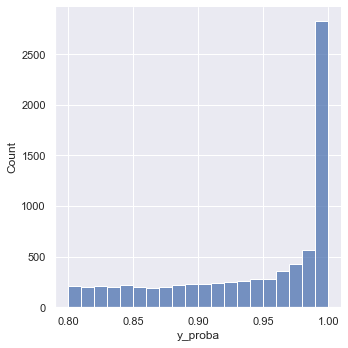

In [15]:
sns.displot(df_filtre["y_proba"], binwidth=0.01)

## Sauvegarde des résultats
---

In [16]:
filename = '221006-CorpusAppFiltre.csv'
df_filtre.to_csv(f'data/corpus/{filename}',index=False)

## Conclusions
---

- Filtrage du Corpus App pour observateurs : OK

## Bricolages
---

In [17]:
import numpy as np

In [25]:
pd.pivot_table(df_corpus,values='url',index='site',columns='y',aggfunc='count')

y,False,True
site,,
actu.fr,2655,225
fr.novopress.info,629,133
fr.sott.net,1880,1013
infodujour.fr,398,108
lalettrepatriote.com,5,1
lemediaen442.fr,1353,961
lesakerfrancophone.fr,304,573
lesdeqodeurs.fr,28,60
lesmoutonsrebelles.com,1607,732


In [19]:
t1 = df_corpus[df_corpus['y']==1].value_counts('site')

KeyError: 'y'

In [ ]:
t2 = df_corpus[df_corpus['y']==0].value_counts('site')

In [20]:
pd.DataFrame([t2,t1]).T.to_csv('data/analysis/221006-DistribInfoxSites.csv')

NameError: name 't2' is not defined

In [21]:
df_corpus.keys()

Index(['url', 'title', 'article', 'author', 'date_iso', 'site', 'infox',
       'y_proba'],
      dtype='object')

In [24]:
df_corpus['y']=df_corpus['y_proba']>0.5

In [23]:
pd.piv

AttributeError: module 'pandas' has no attribute 'piv'